In [2]:
# Libraries
import pandas as pd
import seaborn as sb
sb.set_theme()
import re
import os
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
business = pd.read_json(path_or_buf="/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_business.json", lines=True)

In [16]:
categories = business["categories"]

In [18]:
print(categories)

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 150346, dtype: object


In [19]:
## Count the number of categories
category_set = set()
category_count = Counter()
for category in categories:
  split = str(category).split(",")
  for index, data in enumerate(split):
    if data[0] == " ":
      split[index] = split[index][1:]
  category_count.update(split)
  for data in split:
    category_set.add(data)

print(category_count)

Counter({'Restaurants': 52268, 'Food': 27781, 'Shopping': 24395, 'Home Services': 14356, 'Beauty & Spas': 14292, 'Nightlife': 12281, 'Health & Medical': 11890, 'Local Services': 11198, 'Bars': 11065, 'Automotive': 10773, 'Event Planning & Services': 9895, 'Sandwiches': 8366, 'American (Traditional)': 8139, 'Active Life': 7687, 'Pizza': 7093, 'Coffee & Tea': 6703, 'Fast Food': 6472, 'Breakfast & Brunch': 6239, 'American (New)': 6097, 'Hotels & Travel': 5857, 'Home & Garden': 5799, 'Fashion': 5739, 'Burgers': 5636, 'Arts & Entertainment': 5434, 'Auto Repair': 5433, 'Hair Salons': 5046, 'Nail Salons': 4621, 'Mexican': 4600, 'Italian': 4573, 'Specialty Food': 4233, 'Doctors': 3763, 'Pets': 3758, 'Real Estate': 3577, 'Seafood': 3539, 'Fitness & Instruction': 3293, 'Professional Services': 3270, 'Hair Removal': 3239, 'Desserts': 3186, 'Chinese': 3169, 'Bakeries': 3150, 'Grocery': 3139, 'Salad': 3064, 'Hotels': 2977, 'Chicken Wings': 2966, 'Cafes': 2756, 'Ice Cream & Frozen Yogurt': 2657, 'Ca

In [20]:
print("Total number of unique categories : ", len(category_set))

Total number of unique categories :  1312


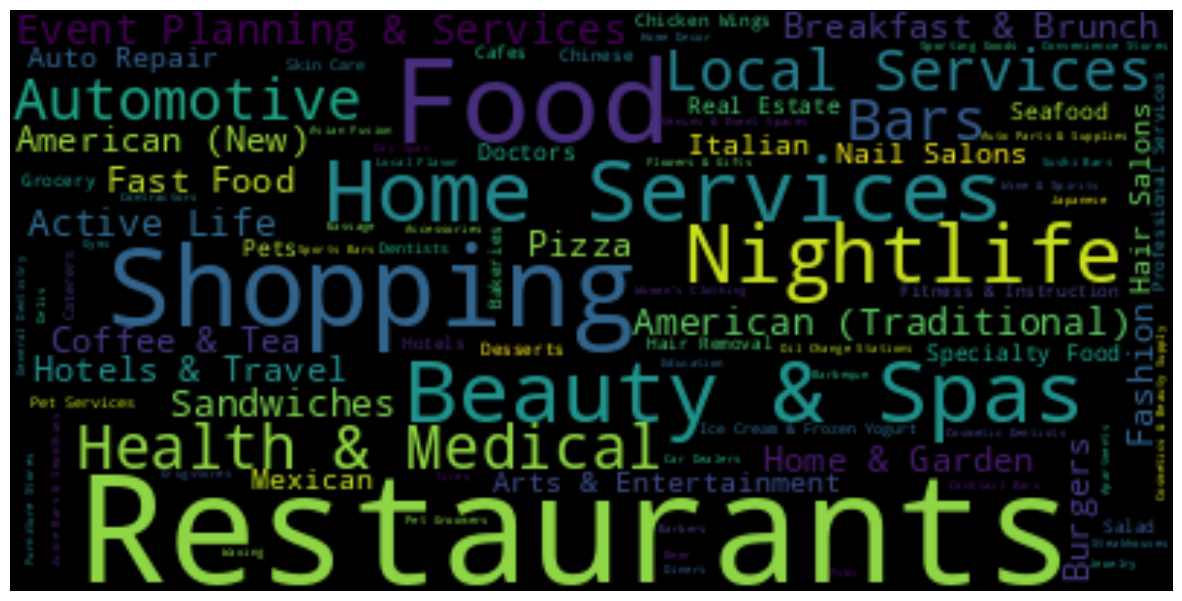

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(category_count)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
## Using based on yelp dataset main categories

category_list = ["Active Life", "Arts & Entertainment", "Automotive", "Beauty & Spas", "Education", "Event Planning & Services", "Financial Services", "Food", "Health & Medical", "Home Services", "Hotels & Travel", "Local Flavor", "Local Services",  "Mass Media", "Nightlife", "Pets", "Professional Services", "Public Services & Government", "Religious Organizations", "Restaurants", "Shopping", "Others"]

In [ ]:
test = business.copy(deep=False)
test = test.iloc[0:0]

category_df = []
category_count = []
for category in category_list:
  category_df.append(test.copy())
  category_count.append(0)

In [ ]:
# Exporting the different business categories into individual dataframe

for index, x in enumerate(categories):
  status = False
  ilocdata = business.iloc[index]
  if not x:
    category_df[-1].loc[category_count[-1]] = ilocdata
    category_count[-1] += 1
    status = True

  for category_index, category in enumerate(category_list):
    if x is None:
      break
    if category in x:
      category_df[category_index].loc[category_count[category_index]] = ilocdata
      category_count[category_index] += 1
      status = True
  if not status:
    category_df[-1].loc[category_count[-1]] = ilocdata
    category_count[-1] += 1

In [ ]:
# Exporting the dataframes into csv files
for index, dataframe in enumerate(category_df):
  path = ("/content/drive/MyDrive/Colab Notebooks/New Export/" + category_list[index] + ".csv")
  print(path)
  dataframe.to_csv(path_or_buf=path)

/content/drive/MyDrive/Colab Notebooks/New Export/Active Life.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Arts & Entertainment.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Automotive.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Beauty & Spas.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Education.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Event Planning & Services.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Financial Services.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Food.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Health & Medical.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Home Services.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Hotels & Travel.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Local Flavor.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Local Services.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Mass Media.csv
/content/drive/MyDrive/Colab Notebooks/N

# Continue from after category seperation

In [4]:
export_dir = "/content/drive/MyDrive/Colab Notebooks/New Export"

csv_list = os.listdir(export_dir)
new_category_df = []
for csv_name in csv_list:
  csv_path = os.path.join(export_dir, csv_name)
  new_category_df.append(pd.read_csv(csv_path))

In [11]:
new_category_df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7954 entries, 0 to 7953
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    7954 non-null   int64  
 1   business_id   7954 non-null   object 
 2   name          7954 non-null   object 
 3   address       7741 non-null   object 
 4   city          7954 non-null   object 
 5   state         7954 non-null   object 
 6   postal_code   7950 non-null   object 
 7   latitude      7954 non-null   float64
 8   longitude     7954 non-null   float64
 9   stars         7954 non-null   float64
 10  review_count  7954 non-null   int64  
 11  is_open       7954 non-null   int64  
 12  attributes    7637 non-null   object 
 13  categories    7954 non-null   object 
 14  hours         6283 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 932.2+ KB


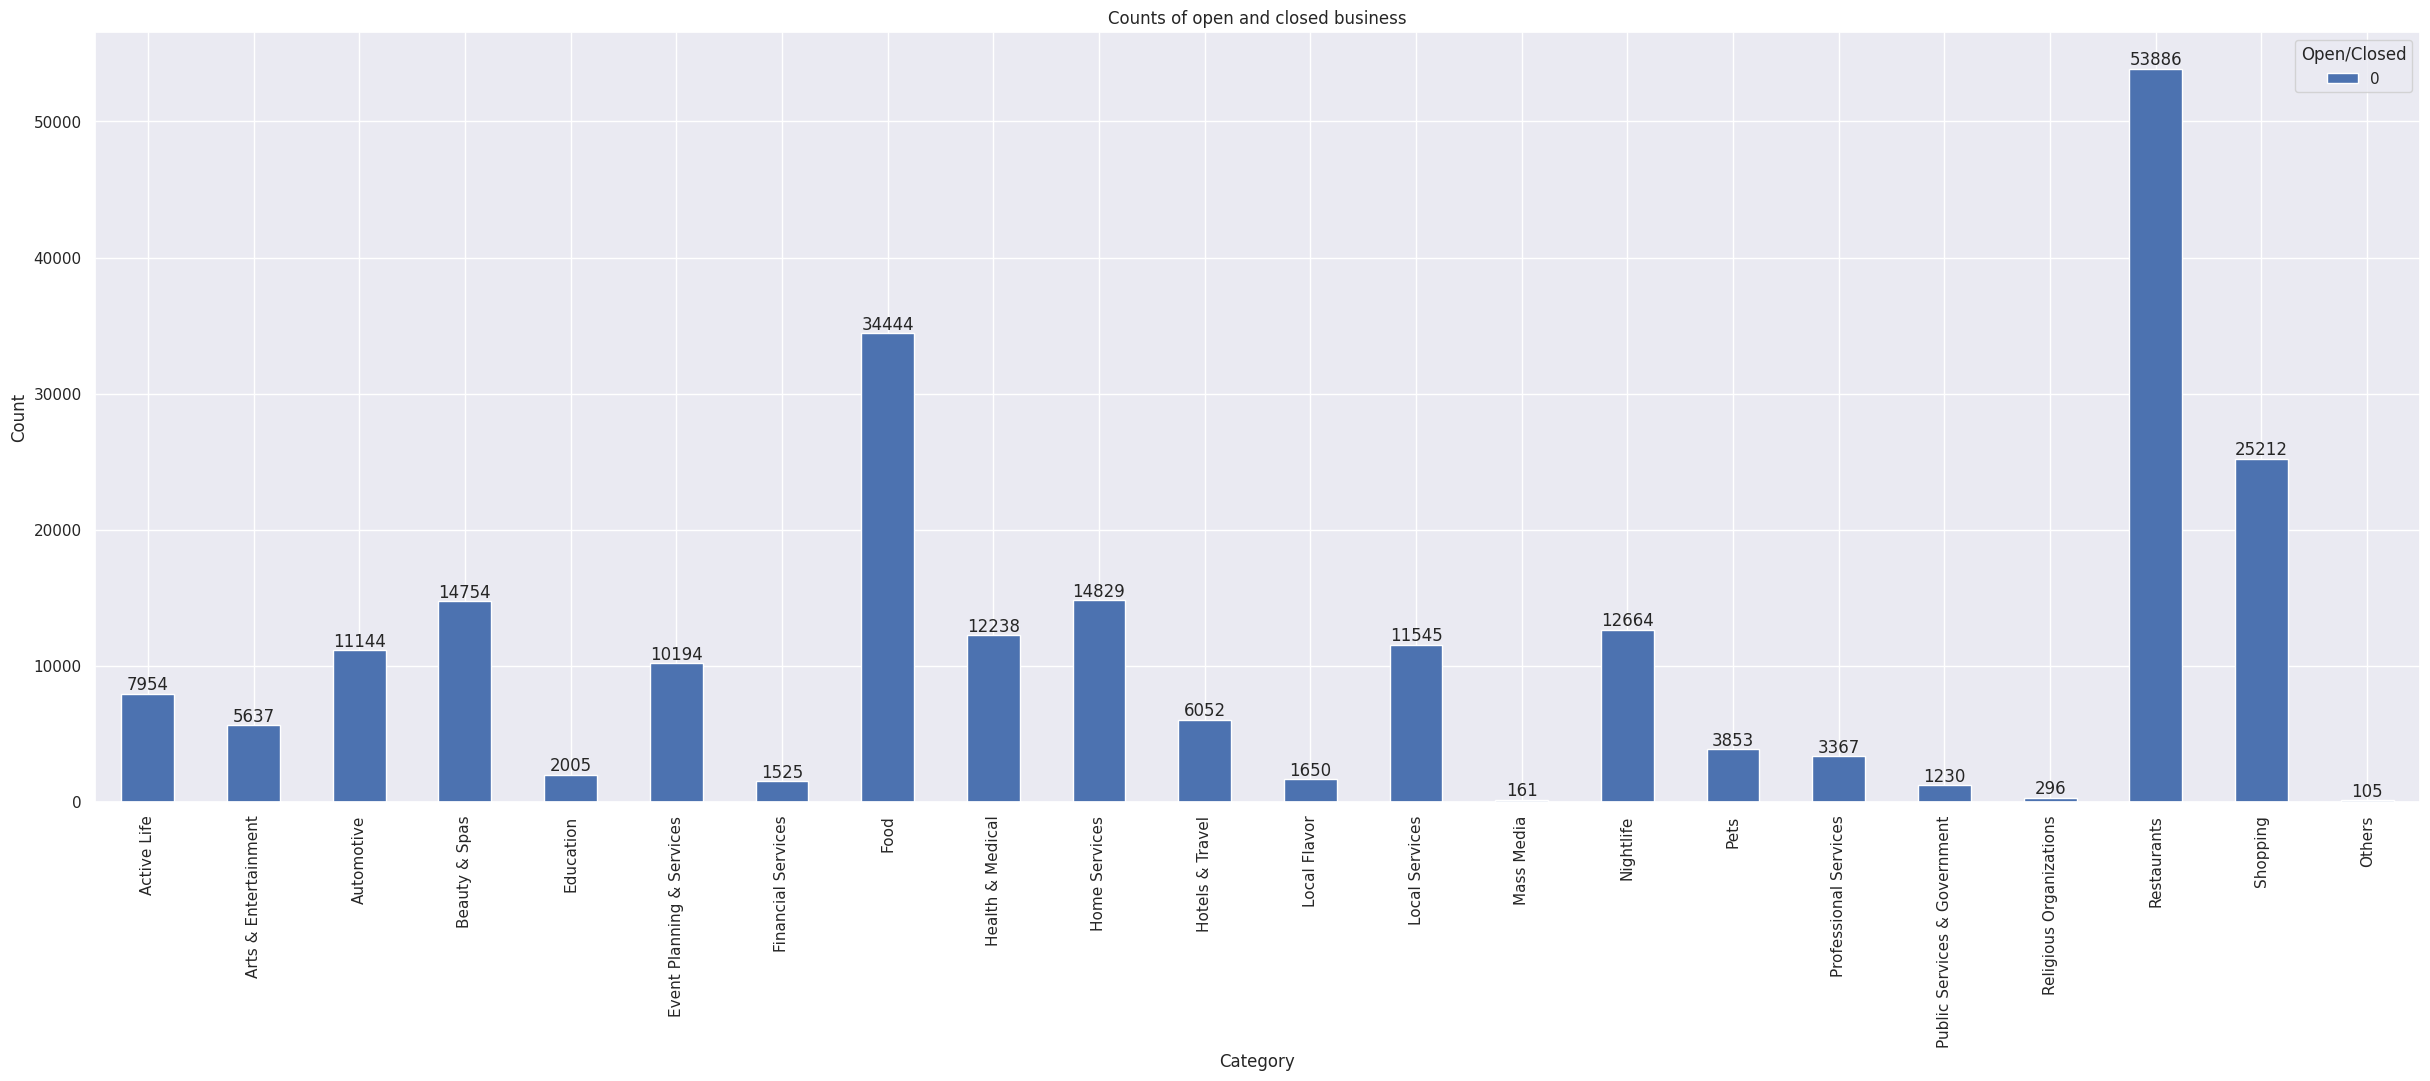

In [13]:
test_df = pd.DataFrame([len(df.index) for df in new_category_df])
test_df.index = category_list

ax = test_df.plot(kind="bar", stacked = False)

for container in ax.containers:
  ax.bar_label(container)

plt.gcf().set_size_inches(30, 10)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Counts of open and closed business")
plt.legend(title = "Open/Closed")
plt.show()

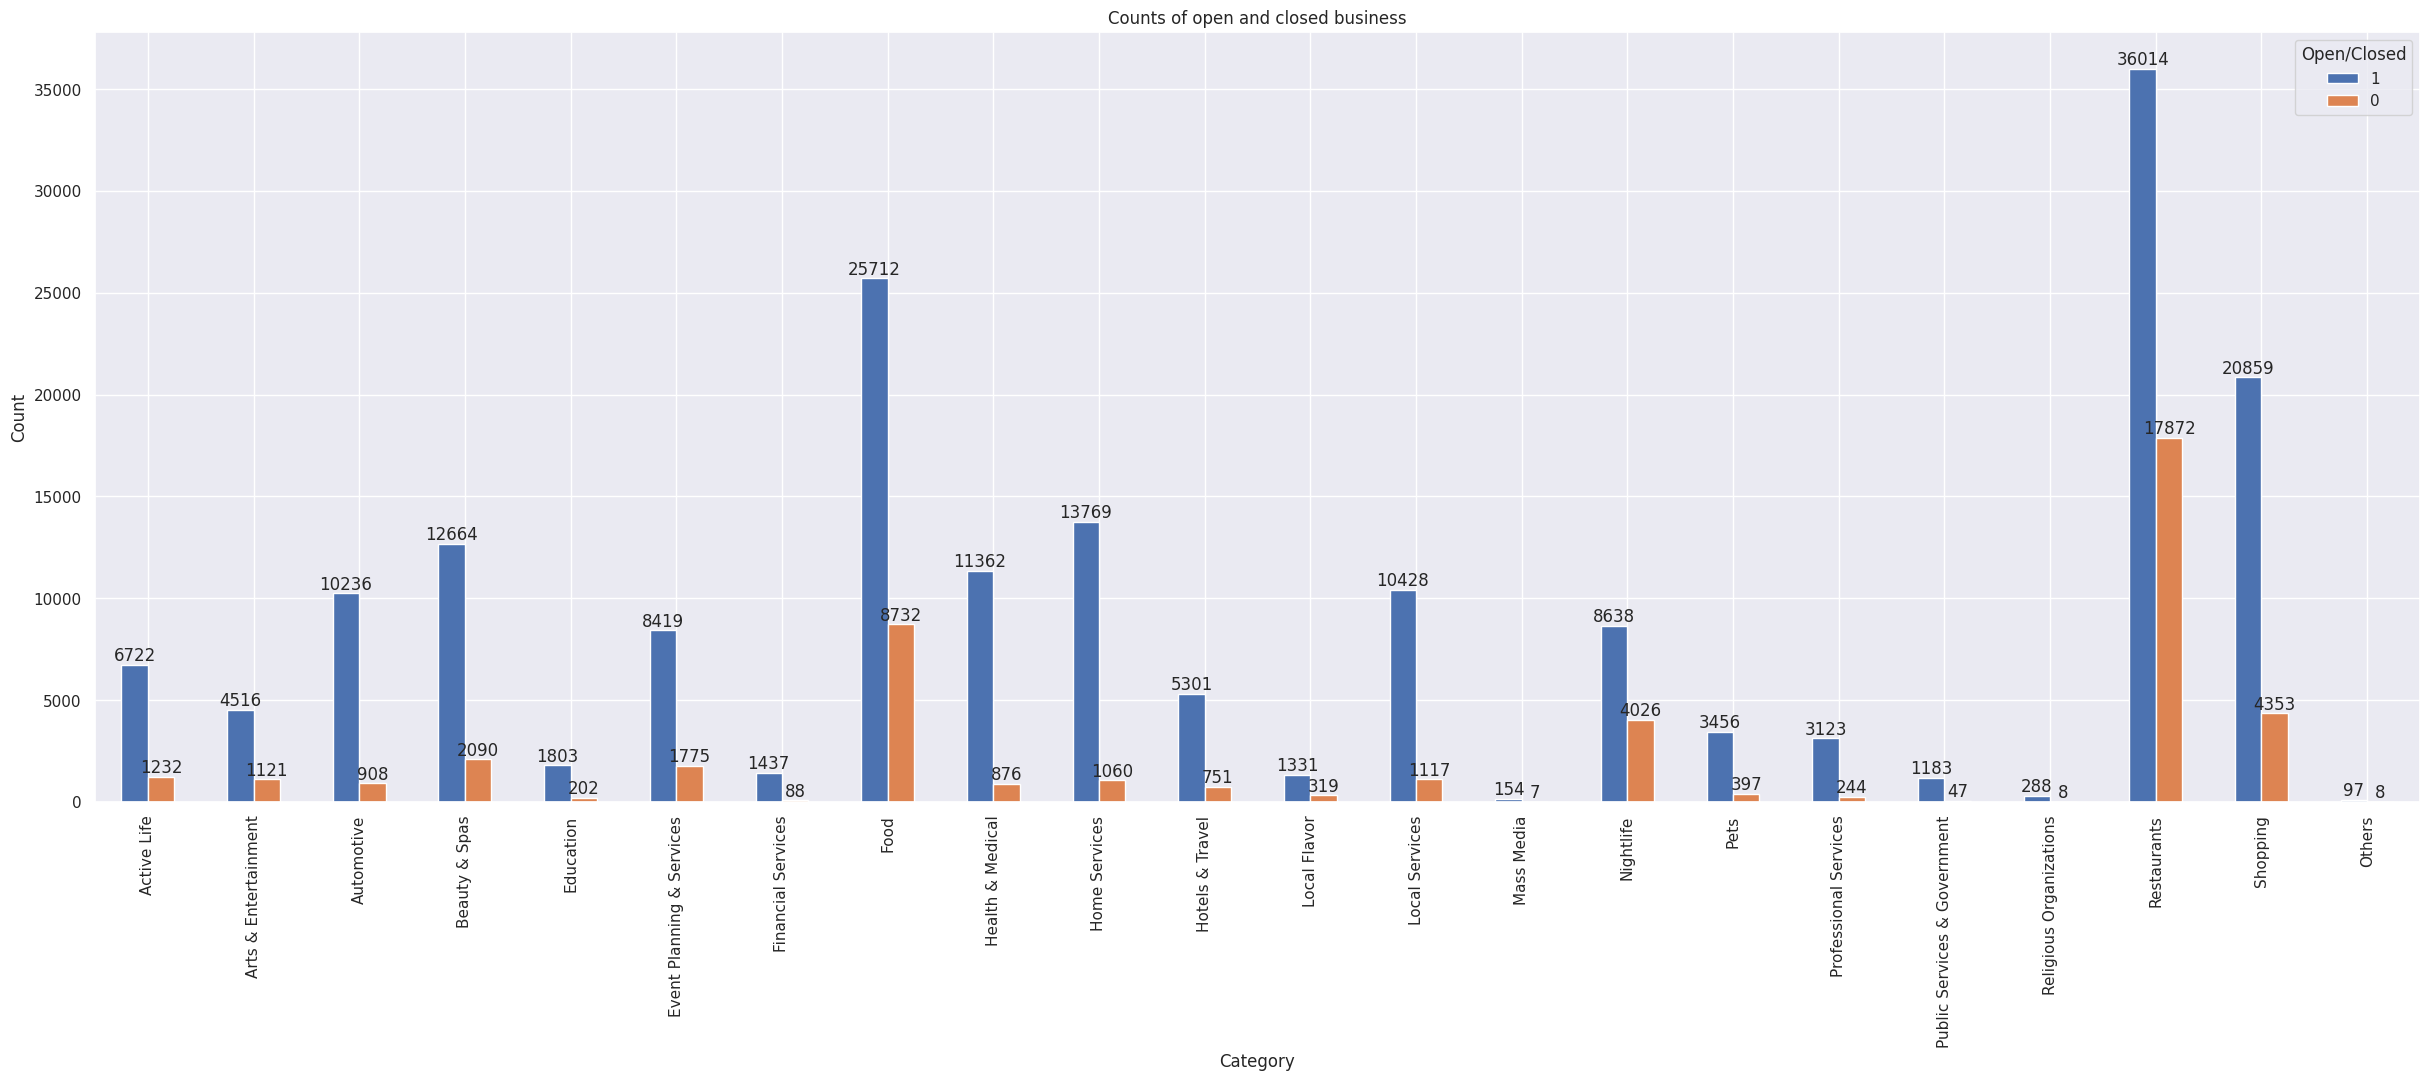

In [7]:
def count_open_closed(df):
  return df["is_open"].value_counts()

test_df = pd.DataFrame([count_open_closed(df) for df in new_category_df])
test_df.index = category_list

ax = test_df.plot(kind="bar", stacked = False)

for container in ax.containers:
  ax.bar_label(container)

plt.gcf().set_size_inches(30, 10)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Counts of open and closed business")
plt.legend(title = "Open/Closed")
plt.show()

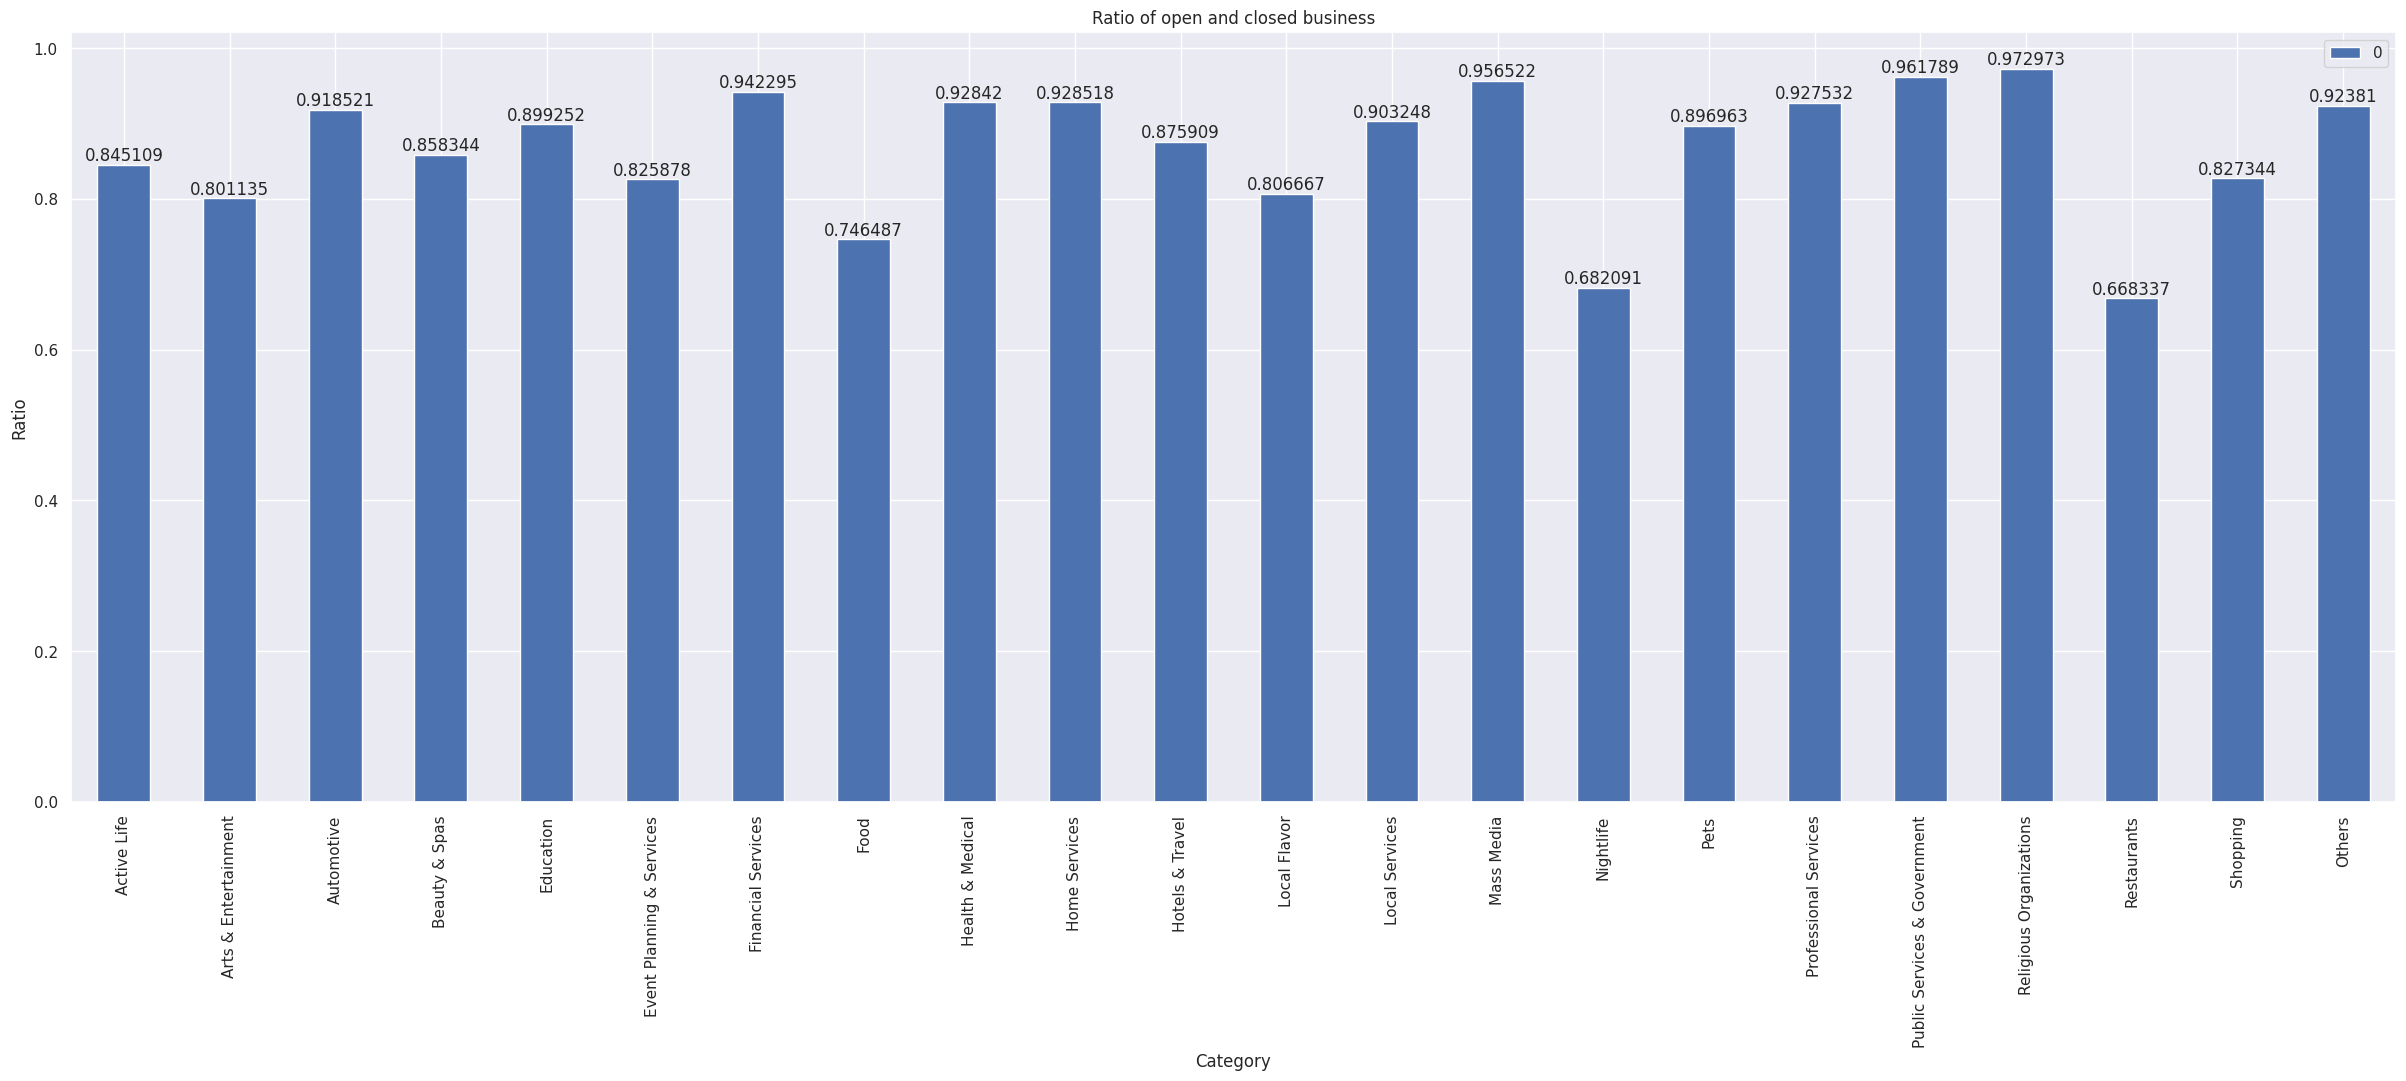

In [ ]:
def count_open_closed(df):
  return df["is_open"].value_counts()

test_df = pd.DataFrame([count_open_closed(df) for df in new_category_df])

ratio_df = pd.DataFrame([((test_df[1][index]) / (test_df[1][index] + test_df[0][index])) for index, x in enumerate(category_list)])
ratio_df.index = category_list

ax = ratio_df.plot(kind="bar", stacked = False)

for container in ax.containers:
  ax.bar_label(container)

plt.gcf().set_size_inches(30, 10)
plt.xlabel("Category")
plt.ylabel("Ratio")
plt.title("Ratio of open and closed business")
plt.show()

Does the type of business affect wether it will stay open or closed

------------------

## Business Category Explanation

`Restaurants` is categorized to businesses where you can sit down and have a meal, typically with table service or a counter where you can order your foods.

`Food` is categorized as businesses that sell food items, but not necessarily in a sit-down dining format.

------------------

## Analysis

Based on the plotted graphs, we can easily see that `Food` is the MOST popular business option that people will open with a total number of `29431` businesses. However it has the second lowest ratio of surviving it business with a value of `0.738269`

Next `Restaurants` has the second highest number of business open, with the HIGHEST number of businesses closed with a ratio of `0.612795`. However, despite that, it has the second most businesses open currently as well.

Following from that we have `Beauty & Spas` and `Home Services` with high count of businesses open which both of the businesses have good ratio of businesses open with a value of `0.860483` and `0.926685` respectively.

`Religious Organizations` has the best ratio of business open with a value of `0.994475` however there is only a total number of `181` businesses from this category.

Based on the statistics and the visualization on the graph, we can see that certain type of busnesses do have a higher chance of staying open while there are certain businesses that will have a high probability of closing, like `Food` and `Restaurants`. However this is most likely due to the high total number of businesses open in that category, thus resulting in a high probrability of it closing as well.

<Figure size 100000x480 with 0 Axes>

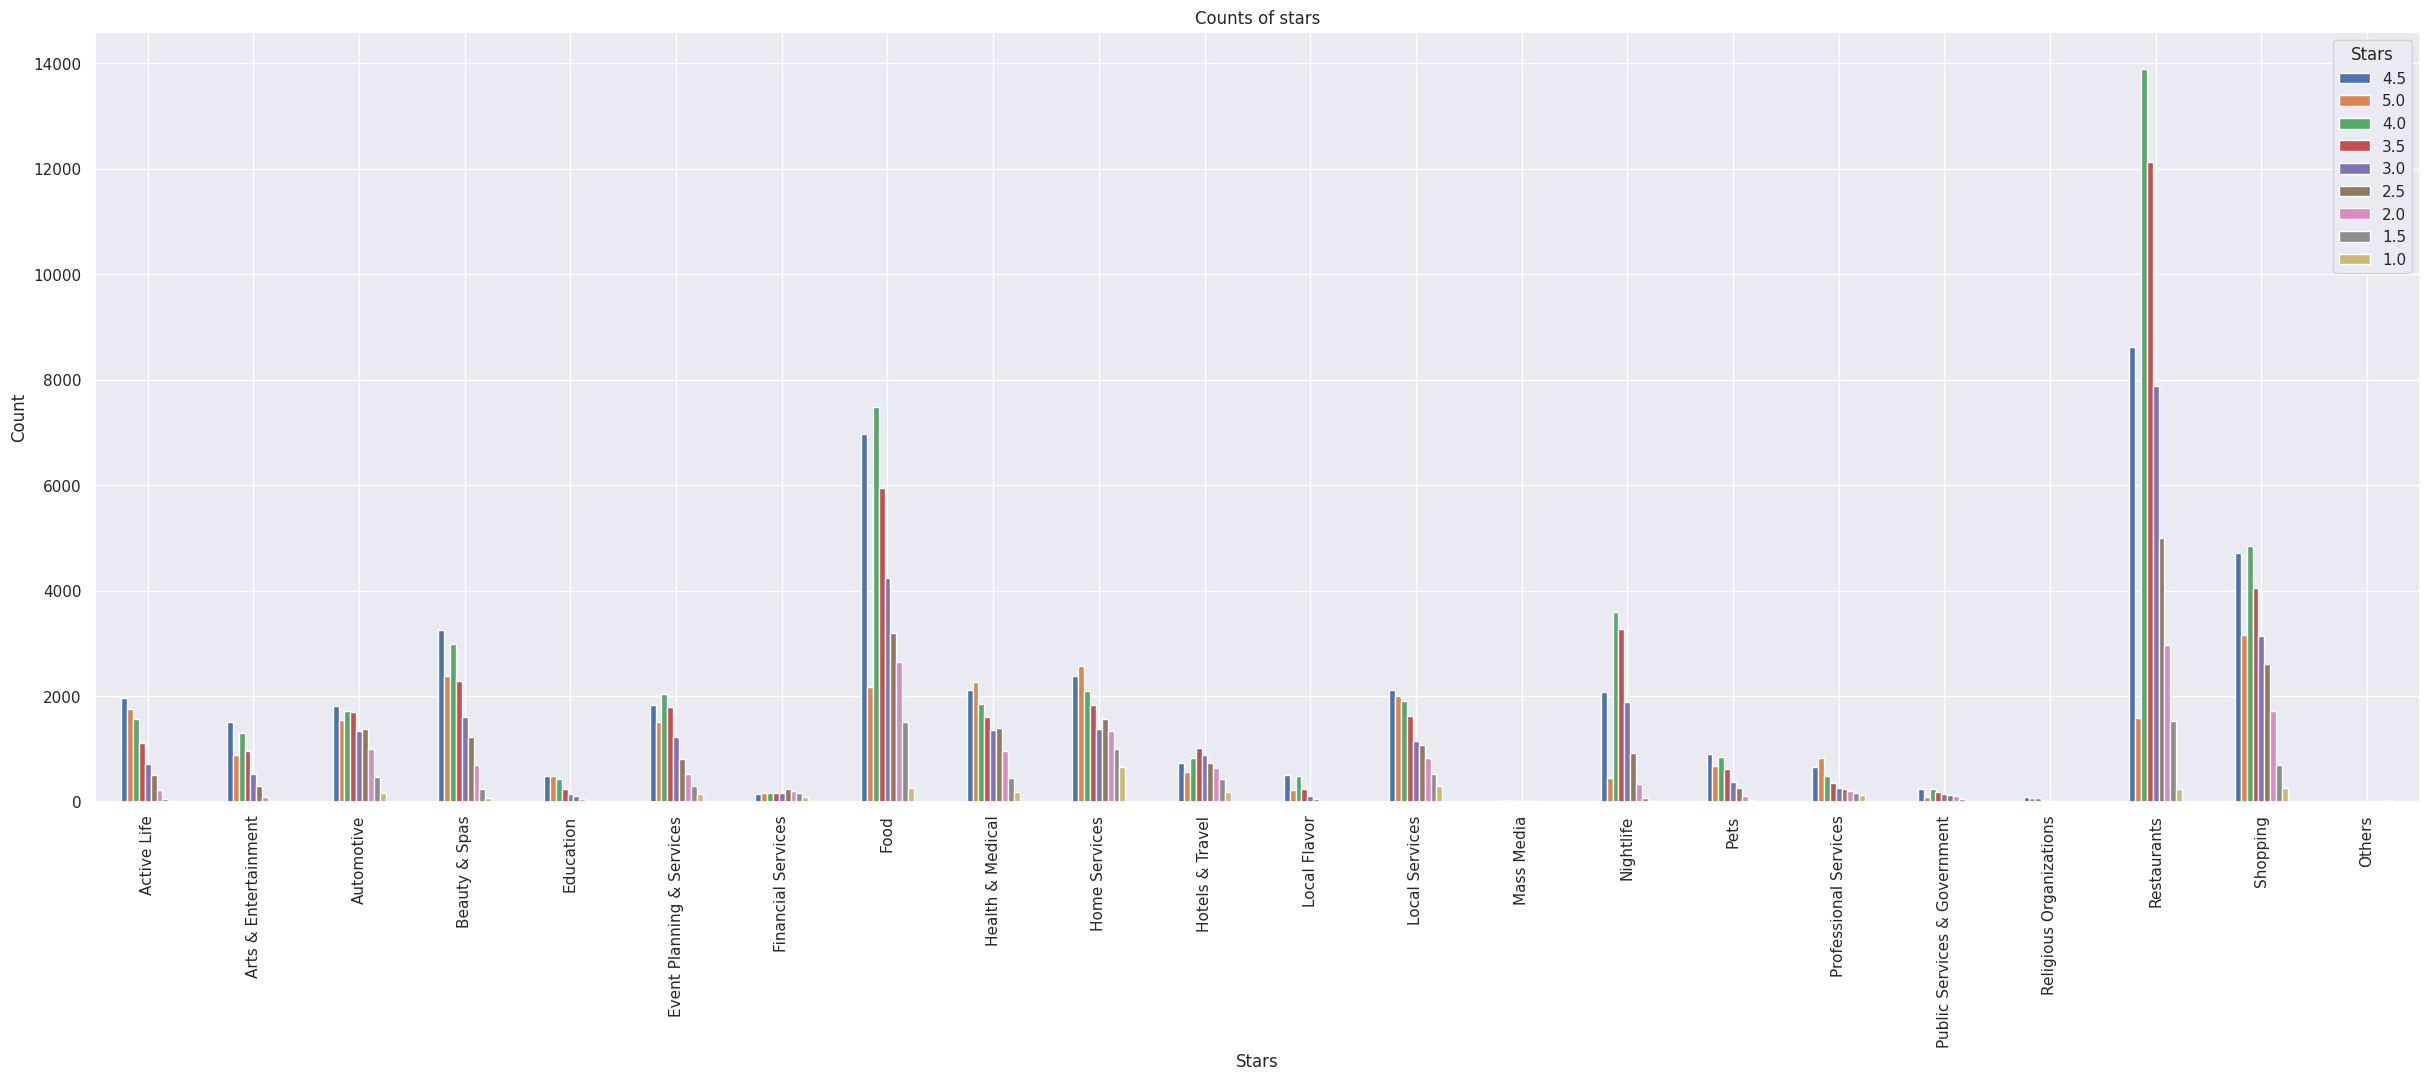

In [21]:
def count_stars(df):
  return df["stars"].value_counts()

test_df = pd.DataFrame([count_stars(df) for df in new_category_df])
test_df.index = category_list

plt.figure().set_figwidth(1000)

test_df.plot(kind="bar", stacked = False)

plt.gcf().set_size_inches(30, 10)
plt.xlabel("Stars")
plt.ylabel("Count")
plt.title("Counts of stars")
plt.legend(title = "Stars")
plt.show()

## Analysis

Naturally with `Food` and `Restaurants` being the most popular business option, we can see that they have the higher stars rating counts as well. Based on plain oberservation, we can see that the general stars rating falls between `4.5` to `3.5`